Exercise 3: Steplength Control for Gradient Descent

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_air = pd.read_fwf('Downloads/datasets/airq402.data', header=None) #Read the required csv file and store it
df_wine = pd.read_csv('Downloads/datasets/winequality-red.csv', sep=";")
df_park = pd.read_csv('Downloads/datasets/parkinsons_updrs.data')

df_air.columns = ["City1","City2","Average Fare","Distance","Average weekly passengers","market leading airline","market share","Average fare","Low price airline","market share","price"]


In [2]:
#Using pearson correlation, dropping the less correlated columns , refer ex02
df_new_air = df_air.loc[:, df_air.columns.intersection(['Average Fare','Distance','Average fare','price'])]

print(df_new_air)


     Average Fare  Distance  Average fare   price
0          114.47       528        111.03  111.03
1          122.47       860        123.09  118.94
2          214.42       852        223.98  167.12
3           69.40       288         68.86   68.86
4          158.13       723        161.36  145.42
..            ...       ...           ...     ...
995        136.16      1104        135.82  118.51
996         83.28       200         82.55   82.55
997        159.97       814        159.65  159.02
998         73.57       174         73.44   73.44
999        126.67       859        129.92  121.94

[1000 rows x 4 columns]


In [3]:
#Using pearson correlation, dropping the less correlated columns , refer ex02
df_wine_new = df_wine.loc[:, df_wine.columns.intersection(['fixed acidity', 'citric acid', 'sulphates', 'alcohol','quality'])]

print(df_wine_new)


      fixed acidity  citric acid  sulphates  alcohol  quality
0               7.4         0.00       0.56      9.4        5
1               7.8         0.00       0.68      9.8        5
2               7.8         0.04       0.65      9.8        5
3              11.2         0.56       0.58      9.8        6
4               7.4         0.00       0.56      9.4        5
...             ...          ...        ...      ...      ...
1594            6.2         0.08       0.58     10.5        5
1595            5.9         0.10       0.76     11.2        6
1596            6.3         0.13       0.75     11.0        6
1597            5.9         0.12       0.71     10.2        5
1598            6.0         0.47       0.66     11.0        6

[1599 rows x 5 columns]


In [4]:
#Using pearson correlation, dropping the less correlated columns , refer ex02
df_park_new = df_park.loc[:, df_park.columns.intersection(['subject#', 'motor_UPDRS', 'age', 'RPDE', 'PPE', 'Shimmer:APQ11','total_UPDRS'])]

print(df_park_new)


      subject#  age  motor_UPDRS  total_UPDRS  Shimmer:APQ11     RPDE      PPE
0            1   72       28.199       34.398        0.01662  0.41888  0.16006
1            1   72       28.447       34.894        0.01689  0.43493  0.10810
2            1   72       28.695       35.389        0.01458  0.46222  0.21014
3            1   72       28.905       35.810        0.01963  0.48730  0.33277
4            1   72       29.187       36.375        0.01819  0.47188  0.19361
...        ...  ...          ...          ...            ...      ...      ...
5870        42   61       22.485       33.485        0.01549  0.64215  0.21367
5871        42   61       21.988       32.988        0.01904  0.52598  0.12621
5872        42   61       21.495       32.495        0.01877  0.47792  0.14157
5873        42   61       21.007       32.007        0.01307  0.56865  0.14204
5874        42   61       20.513       31.513        0.01470  0.58608  0.15336

[5875 rows x 7 columns]


In [5]:
#Splitting data frames for testing and training (20:80)

train_air = df_new_air.sample(frac=0.8)
test_air = df_new_air.drop(train_air.index)
print(train_air.shape)
print(test_air.shape)

y_train_air = np.array(train_air[['price']])
x_train_air = np.array(train_air.drop(['price'],axis =1))

y_test_air = np.array(test_air[['price']])
x_test_air = np.array(test_air.drop(['price'],axis =1))

#print(y_train_air)
print(x_train_air)
print(y_test_air.shape)

(800, 4)
(200, 4)
[[ 176.77  972.    174.92]
 [ 219.31 2063.    222.82]
 [  88.02  409.     80.62]
 ...
 [ 159.97  814.    159.65]
 [  99.45  374.    105.29]
 [ 109.06  647.    110.14]]
(200, 1)


In [6]:
#Splitting wine data set
train_wine = df_wine_new.sample(frac=0.8)
test_wine = df_wine_new.drop(train_wine.index)
print(train_wine.shape)
print(test_wine.shape)

y_train_wine = np.array(train_wine[['quality']])
x_train_wine = np.array(train_wine.drop(['quality'],axis =1))

y_test_wine = np.array(test_wine[['quality']])
x_test_wine = np.array(test_wine.drop(['quality'],axis =1))

#print(y_train_air)
print(x_train_wine)

(1279, 5)
(320, 5)
[[11.7   0.49  0.43  9.2 ]
 [ 7.7   0.1   0.49  9.8 ]
 [ 6.3   0.    0.48 12.3 ]
 ...
 [ 8.1   0.28  1.28  9.3 ]
 [ 8.8   0.38  0.72 11.8 ]
 [ 8.7   0.    0.55  9.7 ]]


In [7]:
#Splitting parkinsons data set
train_park = df_park_new.sample(frac=0.8)
test_park = df_park_new.drop(train_park.index)
print(train_park.shape)
print(test_park.shape)

y_train_park = np.array(train_park[['total_UPDRS']])
x_train_park = np.array(train_park.drop(['total_UPDRS'],axis =1))

y_test_park = np.array(test_park[['total_UPDRS']])
x_test_park = np.array(test_park.drop(['total_UPDRS'],axis =1))

#print(y_train_air)
print(x_train_wine)

(4700, 7)
(1175, 7)
[[11.7   0.49  0.43  9.2 ]
 [ 7.7   0.1   0.49  9.8 ]
 [ 6.3   0.    0.48 12.3 ]
 ...
 [ 8.1   0.28  1.28  9.3 ]
 [ 8.8   0.38  0.72 11.8 ]
 [ 8.7   0.    0.55  9.7 ]]


Function to implement steplength backtracking algorithm:

 Here we decrease the steplength (alpha in this case) by a factor depending on a condition.
 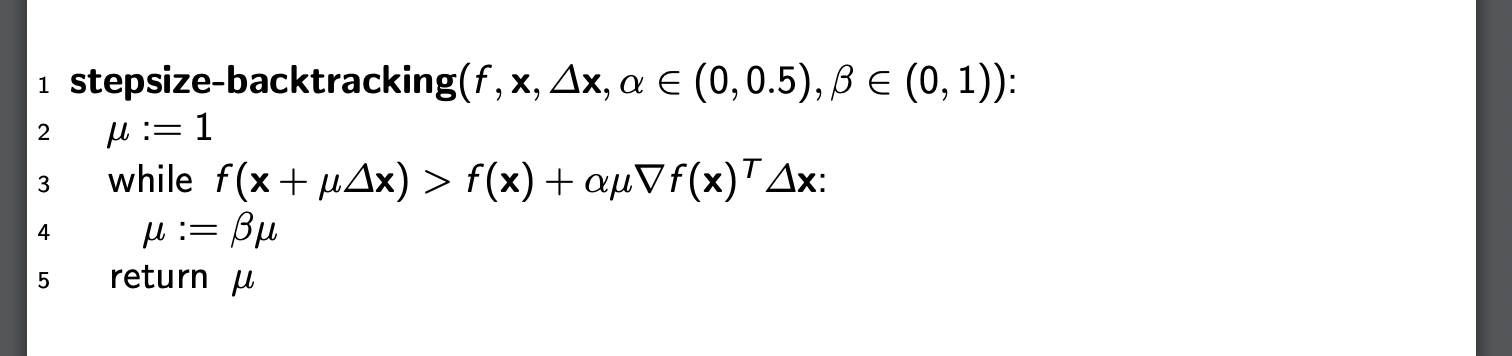
 
 Here $$\delta x = - \delta f(x)$$ 
 $$\alpha = (0,1) $$

In [8]:

def steplength_backtracking(func_loss,alpha,x,y,beta,gradient):
    LHS = func_loss
    
    sq_gradient = np.dot(gradient.T,gradient)
    RHS = func_loss - (alpha*0.1*sq_gradient) 
    while (LHS > RHS):
        alpha = alpha/2
        
        beta = beta - (alpha*gradient)
        y_predicted = np.dot(x,beta)
        error = y - y_predicted
        
        LHS = np.dot(error.T,error)
    return alpha

Function to implement steplength bolddriver algorithm:
    Here we have two factors- decay and increase
    The steplength is increased or decreased by comparing the previous and current loss
    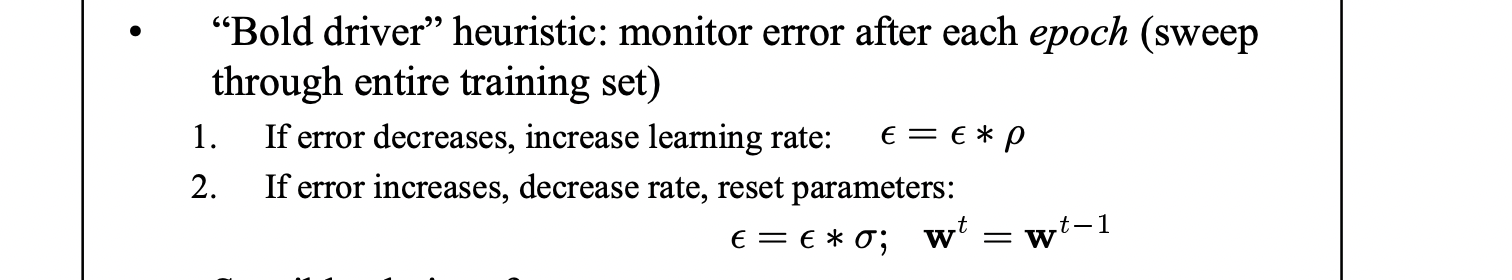

In [9]:
def steplength_bolddriver(func_loss,alpha,x,y,beta,gradient):
    
    decay = 0.9
    increase = 1.1
    
    alpha = alpha * increase 
    
    beta = beta - (alpha*gradient)
    y_predicted = np.dot(x,beta)
    error = y - y_predicted
        
    func_loss_new = np.dot(error.T,error)
    
    while(func_loss < func_loss_new):
        
        alpha = alpha * decay
        
        beta = beta - (alpha*gradient)
        y_predicted = np.dot(x,beta)
        error = y - y_predicted
        
        func_loss_new = np.dot(error.T,error)
    return alpha
        

Function to implement the gradient descent algorithm (same as the one used in ex02)
We find the absolute errors and root mean square errors for each iteration also.
In this algorithm, the steplength can be calculated by using either backtracking or bolddriver method

In [10]:
def gradientDescent(x_train,y_train,x_test,y_test,alpha,imax,steplength_type):
    
    x = np.hstack((np.ones((len(x_train),1)),x_train))
    x_test1 = np.hstack((np.ones((len(x_test),1)),x_test))
    
    beta = np.zeros(x.shape[1]).reshape(-1,1) #initial beta
    prev = 0
    li = []
    lj =[]
    
    y_predicted = np.dot(x,beta) #evaluating y from x and beta
    error_train = y_train - y_predicted #error calc
    
    func_loss = np.dot(error_train.T,error_train) #finding error square 
    f = np.dot(x.T,error_train) #  square of error * x
    gradient = (-2/len(x_train))*f #finding gradient
    
    if(steplength_type == 'backtrack'):
        alpha = steplength_backtracking(func_loss,alpha,x,y_train,beta,gradient) #calling backtrack function
        print("steplength from backtracking",alpha)
    elif(steplength_type == 'bolddriver'):  #calling bolddriver function
        alpha = steplength_bolddriver(func_loss,alpha,x,y_train,beta,gradient)
        print("steplength from bolddriver",alpha)
    
    
    for i in range(imax):
        y_predicted = np.dot(x,beta) #finding y from x and beta
        
        
        error_train =  y_train - y_predicted #finding the error btw the predicted target and actual
        
        #To find the absolute diff of the loss function at the current instance and previous instance
        absolute_diff = abs(np.dot(error_train.T,error_train).reshape(-1) - prev)
        li.append(absolute_diff) #appending the same to get values for each iteration
        
        #Finding y_predicted for the test set
        y_predicted_test = np.dot(x_test1,beta)
        error_test = (y_test - y_predicted_test) # Finding root mean square error
        rms = np.sqrt(np.mean(np.dot(error_test.T,error_test)))
        
        lj.append(rms) # appending the rms values for each iteration
        
        #finding the gradient of loss function
        f = np.dot(x.T,error_train) #  multiplying  error * x
        gradient = (-2/len(x_train))*f
        
        prev = np.dot(error_train.T,error_train).reshape(-1) #store value of the loss function for finding absolute difference
        
        beta = beta - alpha*gradient #New beta value is determined by the descent direction and steplength
        
    return(li,lj)  #returning the lists containing errors for each iteration

Calling the gradient descent algorithm for the airfare dataset using bolddriver steplength algorithm. Also plotting the RMSE and Absolute errors for each iteration

steplength from bolddriver 1.1e-07


<Figure size 432x288 with 0 Axes>

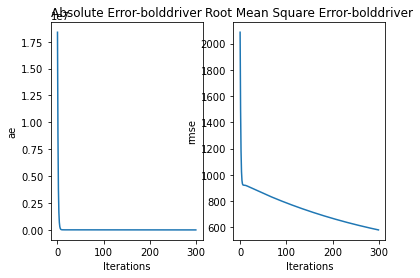

In [11]:
li= []
lj =[]
alpha = 0.0000001
imax = 300
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

li,lj= gradientDescent(x_train_air,y_train_air,x_test_air,y_test_air,alpha,imax,'bolddriver')
fig,(ax1,ax2)= plt.subplots(1,2)
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.set_title("Absolute Error-bolddriver")
ax2.set_title("Root Mean Square Error-bolddriver")
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMSE")
#print(lj)
#print(li)

We observe that the errors steepily decrease by using the bolddriver method

Calling the gradient descent algorithm for the airfare dataset using backtracking steplength algorithm. Also plotting the RMSE and Absolute errors for each iteration

steplength from backtracking 5e-07


<Figure size 432x288 with 0 Axes>

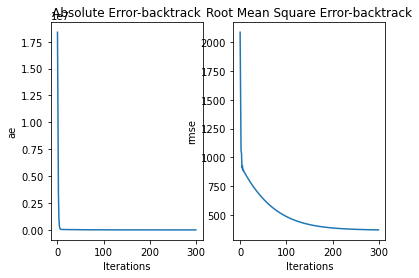

In [12]:
alpha = 0.000001
imax = 300
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


li,lj= gradientDescent(x_train_air,y_train_air,x_test_air,y_test_air,alpha,imax,'backtrack')
fig,(ax1,ax2)= plt.subplots(1,2)
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.set_title("Absolute Error-backtrack")
ax2.set_title("Root Mean Square Error-backtrack")
ax1.plot(range(imax),li,label ="Absolute error-backtrack")
ax2.plot(range(imax),lj,label ="RMSE")

We observe a steep decrease in error in the beginning

Calling the gradient descent algorithm for the wine dataset using backtracking steplength algorithm. Also plotting the RMSE and Absolute errors for each iteration

steplength from backtracking 5e-06


<Figure size 432x288 with 0 Axes>

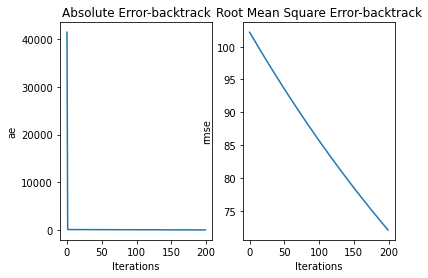

In [13]:
alpha = 0.00001
imax = 200
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

li,lj= gradientDescent(x_train_wine,y_train_wine,x_test_wine,y_test_wine,alpha,imax,'backtrack')
fig,(ax1,ax2)= plt.subplots(1,2)
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.set_title("Absolute Error-backtrack")
ax2.set_title("Root Mean Square Error-backtrack")
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMSE")

We observe that the error decreases quite fast

Calling the gradient descent algorithm for the wine dataset using bolddriver steplength algorithm. Also plotting the RMSE and Absolute errors for each iteration

steplength from bolddriver 0.0011


<Figure size 432x288 with 0 Axes>

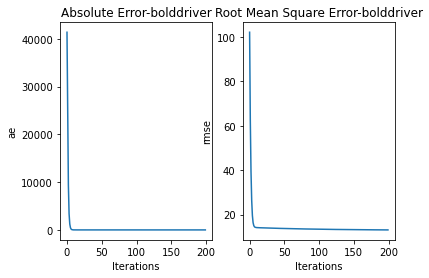

In [14]:
alpha = 0.001
imax = 200
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

li,lj= gradientDescent(x_train_wine,y_train_wine,x_test_wine,y_test_wine,alpha,imax,'bolddriver')
fig,(ax1,ax2)= plt.subplots(1,2)
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.set_title("Absolute Error-bolddriver")
ax2.set_title("Root Mean Square Error-bolddriver")
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMSE")

We observe a steep decrease in the error

Calling the gradient descent algorithm for the parkinsons dataset using backtracking steplength algorithm. Also plotting the RMSE and Absolute errors for each iteration

steplength from backtracking 5e-06


<Figure size 432x288 with 0 Axes>

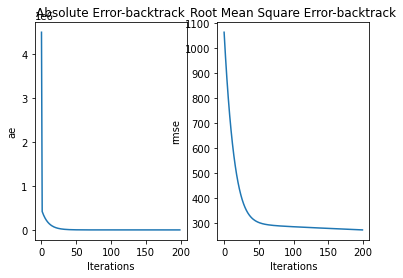

In [15]:
alpha = 0.00001
imax = 200
lj1=[]
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

li,lj1= gradientDescent(x_train_park,y_train_park,x_test_park,y_test_park,alpha,imax,'backtrack')
fig,(ax1,ax2)= plt.subplots(1,2)
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.set_title("Absolute Error-backtrack")
ax2.set_title("Root Mean Square Error-backtrack")
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj1,label ="RMSE")

We observe a steep decrease in the error

Calling the gradient descent algorithm for the parkinsond dataset using bolddriver steplength algorithm. Also plotting the RMSE and Absolute errors for each iteration

steplength from bolddriver 0.00011000000000000002


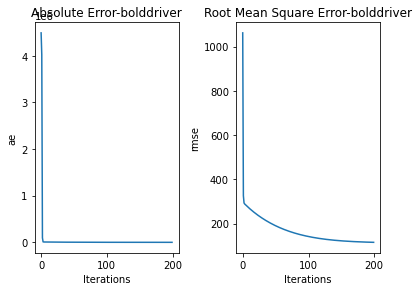

In [16]:
alpha = 0.0001
imax = 200
li,lj= gradientDescent(x_train_park,y_train_park,x_test_park,y_test_park,alpha,imax,'bolddriver')
fig,(ax1,ax2)= plt.subplots(1,2)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('rmse')
ax1.set_ylabel('ae')
ax1.set_title("Absolute Error-bolddriver")
ax2.set_title("Root Mean Square Error-bolddriver")
ax1.plot(range(imax),li,label ="Absolute error")
ax2.plot(range(imax),lj,label ="RMSE")

We observe a steep decrease in the error

Comparing the RMSE metric of parkinsons data set wrt to bolddriver and backtracking step length algorithms

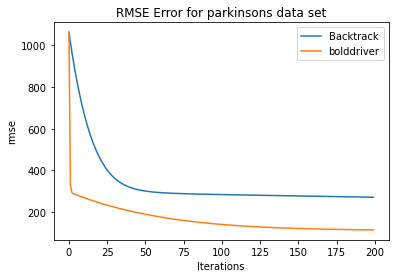

In [17]:


plt.title("RMSE Error for parkinsons data set")
plt.xlabel('Iterations')
plt.ylabel('rmse')
plt.plot(range(imax),lj1,label ="Backtrack")
plt.plot(range(imax),lj,label ="bolddriver")
plt.legend()

We find that lower RMSE is reached faster by the boldriver method. Hence that is a better step controller method based on RMSE values

In [18]:
#def lookAheadOptimizer(x_train_park,y_train_park,x_test_park,y_test_park,alpha,imax):
    


References

https://matplotlib.org/
https://numpy.org/
https://www.kaggle.com/rakend/multiple-linear-regression-with-gradient-descent
https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
https://pandas.pydata.org/
https://medium.com/analytics-vidhya/implementing-gradient-descent-for-multi-linear-regression-from-scratch-3e31c114ae12
https://www.cs.toronto.edu/~hinton/csc2515/notes/lec6tutorial.pdf